In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
%matplotlib inline

In [3]:
df = pd.read_csv("ad_click_dataset.csv")

In [4]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


In [7]:
df = df.drop(columns = ["id"])

In [8]:
df.describe(include = "all")

,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
count,10000,5234.000000,5307,8000,8000,5218,8000,10000.000000
unique,4000,NaN,3,3,3,5,4,NaN
top,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN
freq,25,NaN,1834,2754,2817,1175,2126,NaN
mean,NaN,40.197363,NaN,NaN,NaN,NaN,NaN,0.650000
std,NaN,13.126420,NaN,NaN,NaN,NaN,NaN,0.476993
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,39.500000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [21]:
categorical_columns = df.select_dtypes(include=['object'])


unique_values = {col: df[col].nunique() for col in categorical_columns}


for col, unique_count in unique_values.items():
    print(f"Column: {col}, Unique Values: {unique_count}")


Column: full_name, Unique Values: 4000
Column: gender, Unique Values: 3
Column: device_type, Unique Values: 3
Column: ad_position, Unique Values: 3
Column: browsing_history, Unique Values: 5
Column: time_of_day, Unique Values: 4


In [22]:
missing_df = df.isna().mean()*100
missing_df = missing_df[missing_df>5].sort_values(ascending = False)
print("Columns with more than 5% missing values:")
print(missing_df)

Columns with more than 5% missing values:
browsing_history    47.82
age                 47.66
gender              46.93
device_type         20.00
ad_position         20.00
time_of_day         20.00
dtype: float64


In [25]:
import plotly.express as px
def plot_pie_chart(df, column_name):
    value_counts = df[column_name].value_counts(dropna=False)
    value_counts = value_counts.reset_index()
    value_counts.columns = [column_name, 'count']

    fig = px.pie(value_counts, names=column_name, values="count",
                 title = f'{column_name} Distribution (Including Unknown)' ,
                 color_discrete_sequence=px.colors.qualitative.T10,
                 hole=0.4)

    fig.update_traces(textinfo='percent+label')
    fig.update_layout(title_x=0.5)
    fig.show()

categorical_columns = df.select_dtypes(include = ['object']).columns
categorical_columns = categorical_columns.drop('full_name', errors = 'ignore')
for col in categorical_columns:
    plot_pie_chart(df,col)                

In [27]:
df_user_type = df.copy()
user_counts = df_user_type["full_name"].value_counts()
df_user_type['user_type'] = df_user_type['full_name'].apply(lambda x: 'First Time Users' if user_counts[x] == 1 else 'Recurring Users')

In [28]:
recurring_users = df_user_type[df_user_type.duplicated(subset=['full_name'], keep = False)]
first_time_users= df_user_type.drop_duplicates(subset = ['full_name'], keep=False)

In [29]:
recurring_users.describe(include='all')

,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
count,6500,3351.000000,3449,5190,5218,3336,5216,6500.0,6500
unique,500,NaN,3,3,3,5,4,NaN,1
top,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN,Recurring Users
freq,25,NaN,1206,1829,1936,808,1414,NaN,6500
mean,NaN,39.390033,NaN,NaN,NaN,NaN,NaN,1.0,NaN
std,NaN,12.859786,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
25%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
50%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN
75%,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [30]:
first_time_users.describe(include = 'all')

,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
count,3500,1883.000000,1858,2810,2782,1882,2784,3500.0,3500
unique,3500,NaN,3,3,3,5,4,NaN,1
top,User9452,NaN,Female,Mobile,Side,News,Evening,NaN,First Time Users
freq,1,NaN,628,971,953,399,725,NaN,3500
mean,NaN,41.634095,NaN,NaN,NaN,NaN,NaN,0.0,NaN
std,NaN,13.472270,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
25%,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN
75%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [32]:
feature_counts = df_user_type.groupby(['user_type', 'click']).size().reset_index(name='count')

feature_counts['click'] = feature_counts['click'].map({0: "No Click", 1: 'Click'})

fig = px.bar(feature_counts, 
             x = 'user_type', y = 'count', color = 'click',
             title = 'Ad Clicks by User Type (First Time vs Recurring)',
             labels = {"user_type": "User Type", "count": "Number of Clicks", "click" : "Click Status"},
             color_discrete_sequence = px.colors.qualitative.T10,
             text = 'count',
             barmode = 'group')

fig.update_traces(texttemplate = '%{text: .2s}', textposition = 'inside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    title_x=0.5,
    xaxis_title='User Type',
    yaxis_title='Number of Clicks',
    legend_title="Click Status",
    bargap=0.5,
    bargroupgap=0.1
)

fig.show()

In [33]:
recurring_users.sort_values(by='full_name', ascending=True).head(30)

,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,user_type
1078,User1020,NaN,NaN,Mobile,Side,NaN,Morning,1,Recurring Users
3648,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
2799,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
3633,User1020,NaN,NaN,NaN,Side,Education,Morning,1,Recurring Users
1469,User1020,NaN,NaN,Mobile,Side,Education,NaN,1,Recurring Users
3018,User1020,NaN,NaN,Mobile,NaN,Education,Morning,1,Recurring Users
7880,User1020,NaN,NaN,NaN,Side,Education,NaN,1,Recurring Users
7215,User1020,NaN,NaN,Mobile,Side,NaN,Morning,1,Recurring Users
195,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users
2666,User1020,NaN,NaN,Mobile,Side,Education,Morning,1,Recurring Users


In [35]:
df.update(df.groupby('full_name').transform(lambda x: x.ffill().bfill()))
df = df.drop(columns=['full_name'])

In [36]:
for col in df.select_dtypes(include = 'object').columns:
    df[col].fillna('Unknown', inplace = True)

In [39]:
from sklearn.impute import KNNImputer
import pandas as pd
def knn_impute(df, n_neighbors = 5):
    df_encoded = df.copy()

    category_mappings = {}
    for col in df_encoded.select_dtypes(include = 'object').columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
        category_mappings[col] = dict(enumerate(df[col].astype('category').cat.categories))

    knn_imputer = KNNImputer(n_neighbors = n_neighbors)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_encoded), columns=df_encoded.columns)

    for col in df.select_dtypes(include='object').columns:
        df_imputed[col] = df_imputed[col].round().astype(int).map(category_mappings[col])

    return df_imputed

df_imputed = knn_impute(df, n_neighbors = 5)

df = df_imputed

print(df.isna().sum())




age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64


In [44]:
age_bins = [15,20,25,30,35,40,45,50,55,60,65]

age_labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64']

df_visualization = df.copy()
df_visualization['age_group'] = pd.cut(df_visualization['age'], bins = age_bins, labels=age_labels, right=False)


click_counts = df_visualization.groupby(['age_group', 'click']).size().reset_index(name='count')

click_counts['click'] = click_counts['click'].map({0: 'No Click', 1: 'Click'})

fig = px.bar(
    click_counts,
    x = 'age_group',
    y = 'count',
    color = 'click',
    title = 'Age group distribution of clicks vs no clicks',
    labels=  {'age_group' : "Age Group", 'count' : 'Count', 'click' : 'Click Status'},
    text= 'count',
    color_discrete_sequence = px.colors.qualitative.T10,
    category_orders = {'age_group' : age_labels}

)

fig.update_layout(
    barmode = 'stack',
    xaxis_title = 'Age Group',
    yaxis_title = 'Count',
    legend_title = 'Click Status',
    title_x = 0.5
)

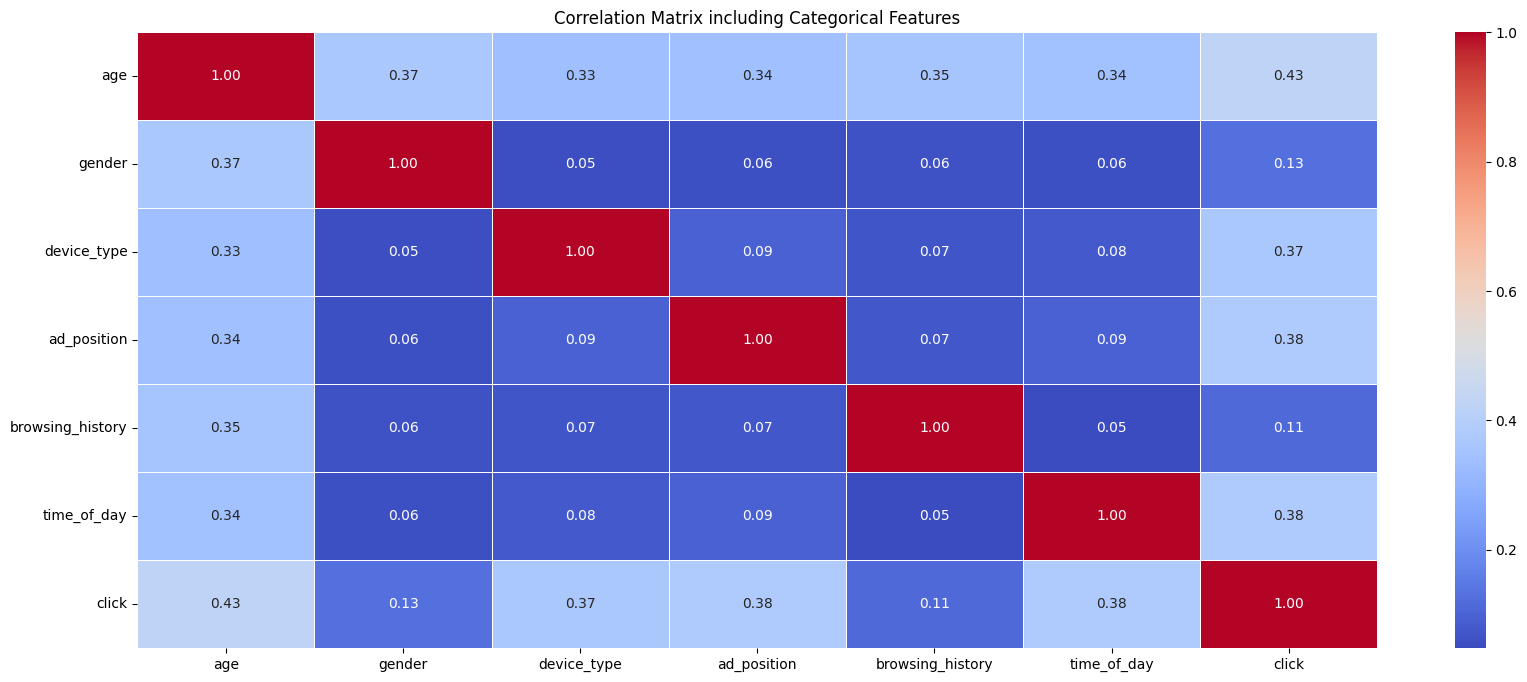

In [46]:
from dython.nominal import associations
associations_df = associations(df, nominal_columns = 'all', plot = False)

corr_matrix = associations_df['corr']

plt.figure(figsize = (20,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

x = df.drop('click', axis = 1)
y = df['click']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=94)

In [53]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

object_columns = df.select_dtypes(include = 'object').columns

preprocessor = ColumnTransformer(
    transformers = [(f'{col}_ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False), [col]) for col in object_columns],
    remainder = 'passthrough'
)

In [55]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

model = XGBClassifier(scale_pos_weight = scale_pos_weight, random_state=94, use_label_encoder = False, eval_metric = 'logloss')


pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state = 94)),
    ('classifier', model)
])

In [56]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report : \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       706
         1.0       0.93      0.99      0.96      1294

    accuracy                           0.95      2000
   macro avg       0.96      0.93      0.94      2000
weighted avg       0.95      0.95      0.95      2000

Confusion Matrix: 
 [[ 614   92]
 [  11 1283]]


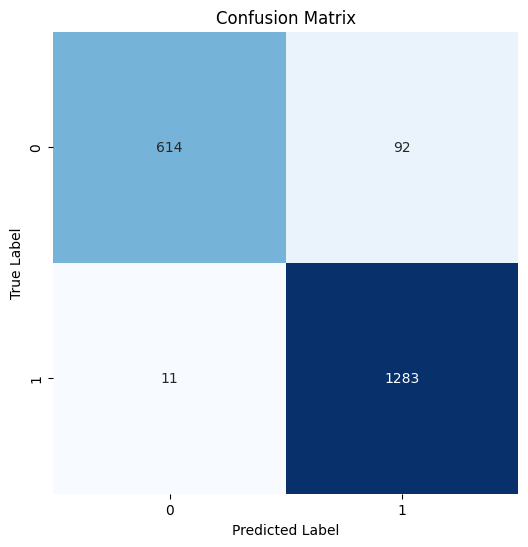

In [58]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

Classification Report for the Best Model:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       706
         1.0       0.95      1.00      0.97      1294

    accuracy                           0.97      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix for the Best Model:
 [[ 637   69]
 [   0 1294]]


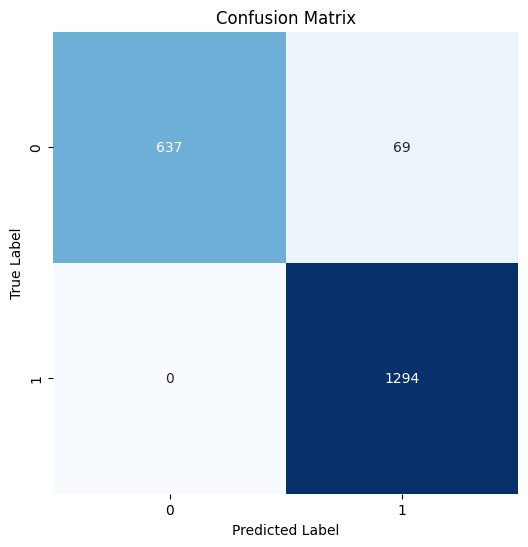

In [61]:
model_best = XGBClassifier(
    scale_pos_weight=scale_pos_weight, 
    learning_rate=0.2, 
    max_depth=7, 
    n_estimators=200, 
    random_state=94, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=94)),
    ('classifier', model_best)
])

pipeline_best.fit(x_train, y_train)

y_pred_best = pipeline_best.predict(x_test)

print("Classification Report for the Best Model:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix for the Best Model:\n", confusion_matrix(y_test, y_pred_best))

plot_confusion_matrix(y_test, y_pred_best)